#     RESULTS OF THE  SET OF SIMULATIONS

## Loading results

In [95]:
%matplotlib notebook

In [96]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from thermalspin.data_analysis  import *

In [97]:
# Insert here the name of the simulation set
setname = "heisenberg_2D"

In [98]:
final_state_lst, L_lst, t_lst, J_lst, D_lst, Hz_lst, T_lst, e_lst, m_lst, snp = load_set_results(setname)

In [99]:
L, T, t_whole, J_whole, D_whole, Hz_whole, e_whole, m_whole, final_state = \
arrange_set_results_LT(L_lst, t_lst, J_lst, D_lst, Hz_lst, T_lst, e_lst, m_lst, final_state_lst)[:-1]
L_num = t_whole.shape[0]
T_num = t_whole.shape[1]
t_num = t_whole.shape[2]

## Global behaviour

<IPython.core.display.Javascript object>


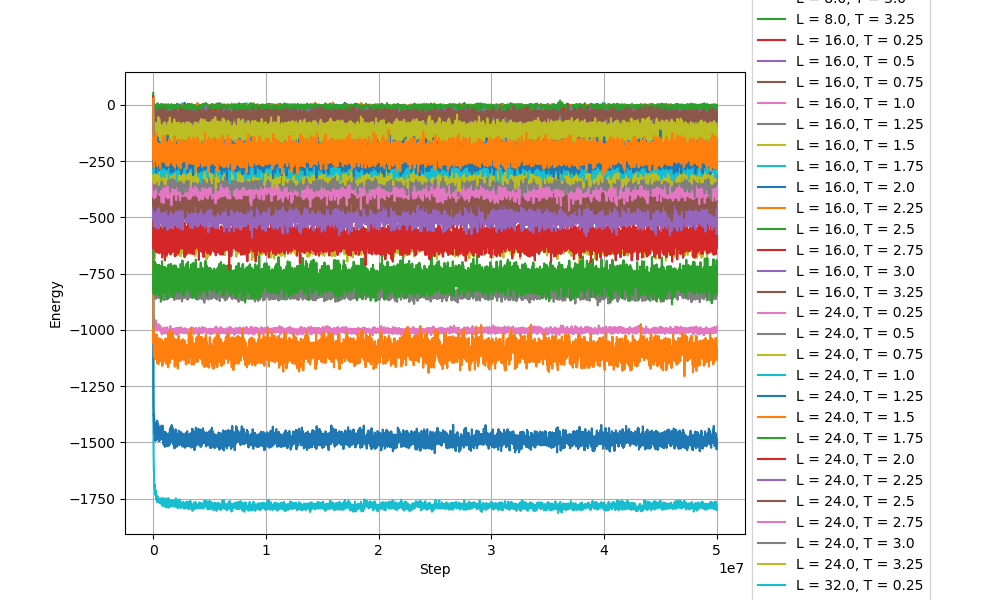

In [100]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], e_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Energy")
plt.grid()
plt.show()

In [101]:
m_magnitude_whole = np.sqrt(np.sum(m_whole**2, axis = 3))

<IPython.core.display.Javascript object>


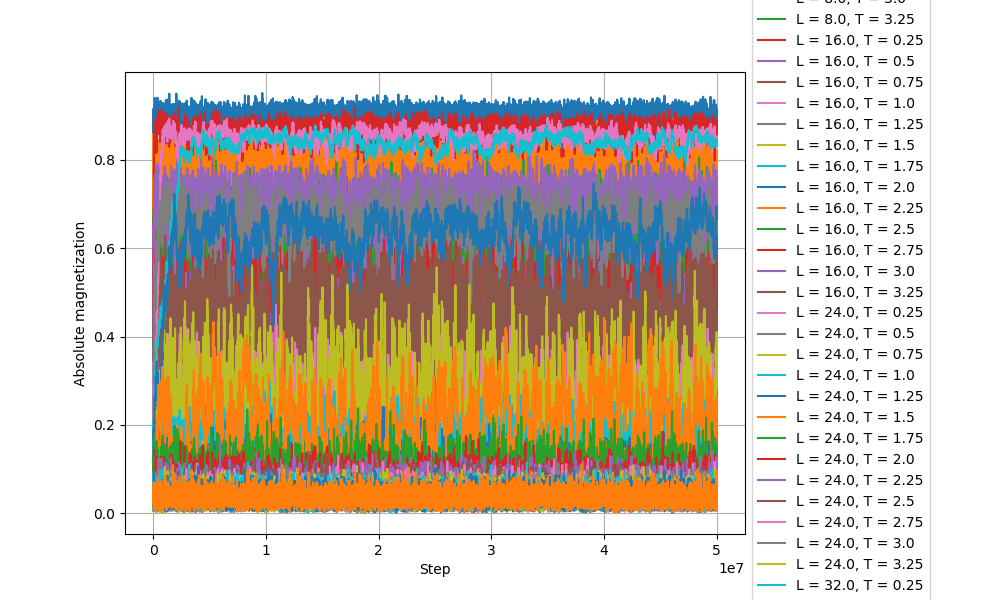

In [102]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i,j in np.ndindex(L_num, T_num):
    ax.plot(t_whole[i,j], m_magnitude_whole[i,j], label=f"L = {L[i]}, T = {T[j]}")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("Absolute magnetization")
plt.grid()
plt.show()

## Single ensemble analysis

In [103]:
# Insert here index of the ensemble to be analyzed 
L_idx = 0
T_idx = 0

<IPython.core.display.Javascript object>


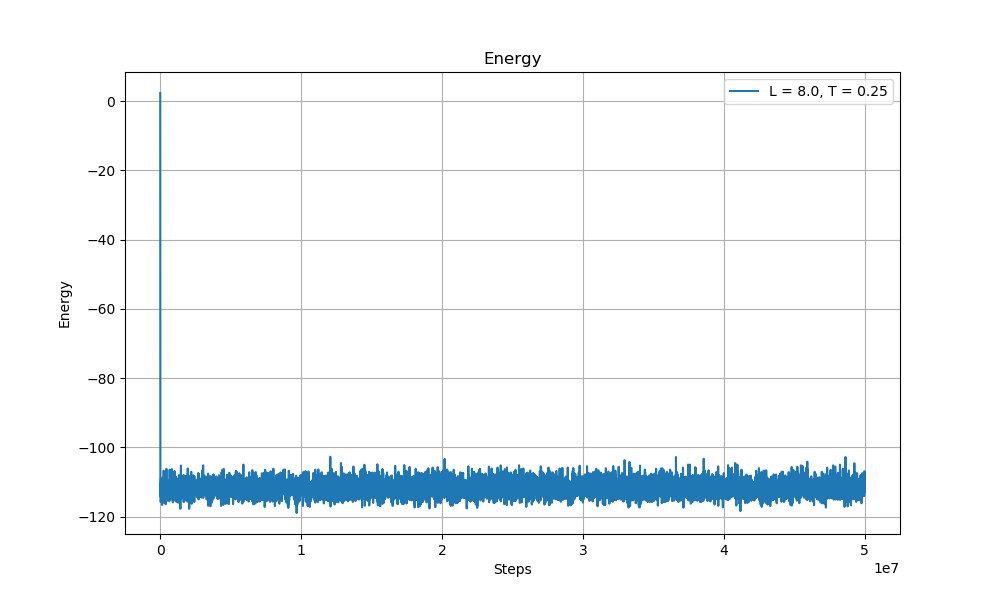

In [104]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], e_whole[L_idx, T_idx], label=f"L = {L[L_idx]}, T = {T[T_idx]}")
ax.legend()
plt.ylabel("Energy")
plt.xlabel("Steps")
plt.title("Energy")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


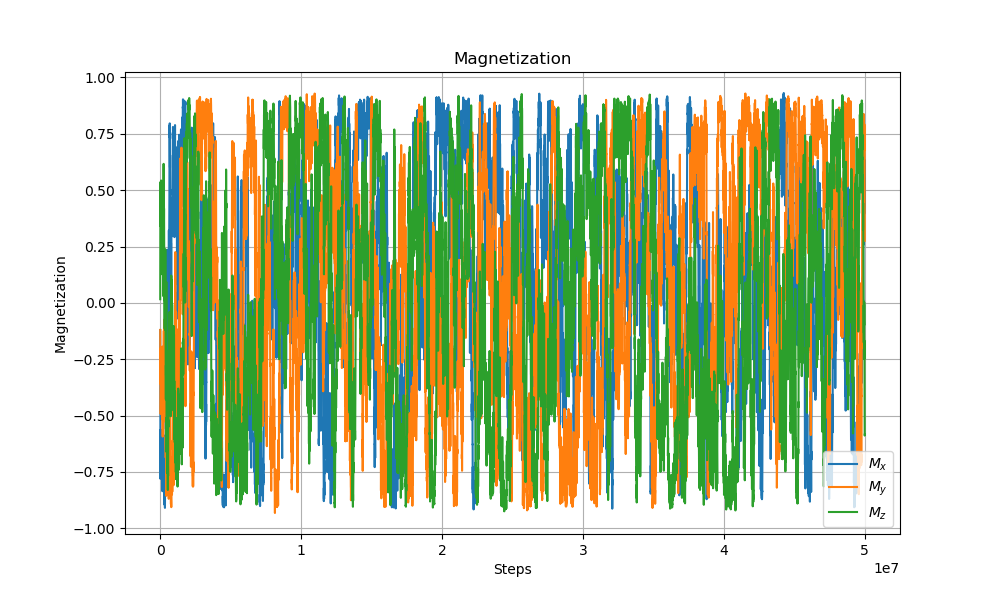

In [105]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 0], label = r"$M_x$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 1], label = r"$M_y$")
ax.plot(t_whole[L_idx, T_idx], m_whole[L_idx, T_idx, :, 2], label = r"$M_z$")
plt.legend()
plt.ylabel("Magnetization")
plt.xlabel("Steps")
plt.title("Magnetization")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


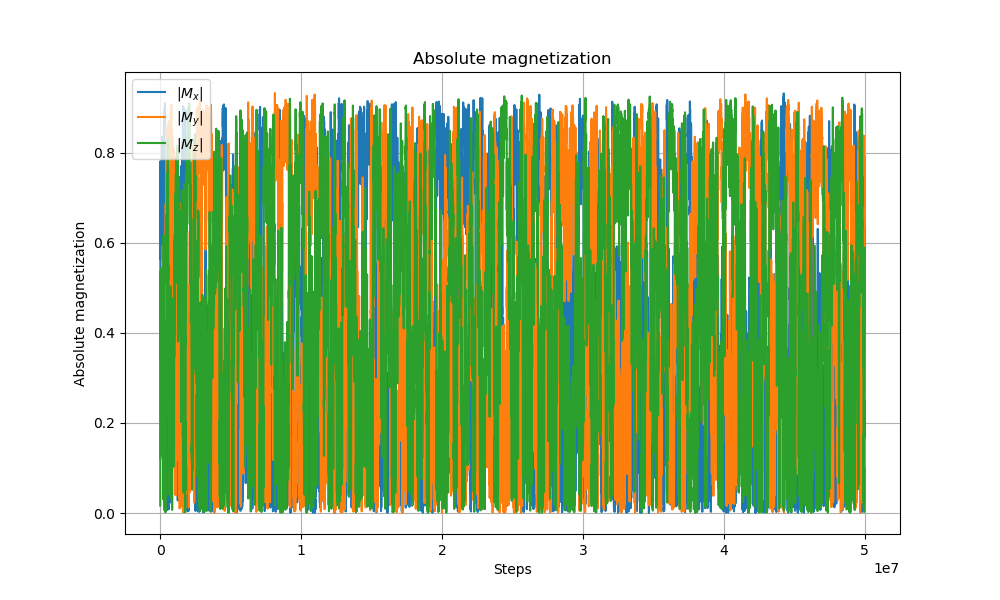

In [106]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 0]), label = r"$|M_x|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 1]), label = r"$|M_y|$")
ax.plot(t_whole[L_idx, T_idx], np.abs(m_whole[L_idx, T_idx, :, 2]), label = r"$|M_z|$")
plt.legend()
plt.ylabel("Absolute magnetization")
plt.xlabel("Steps")
plt.title("Absolute magnetization")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


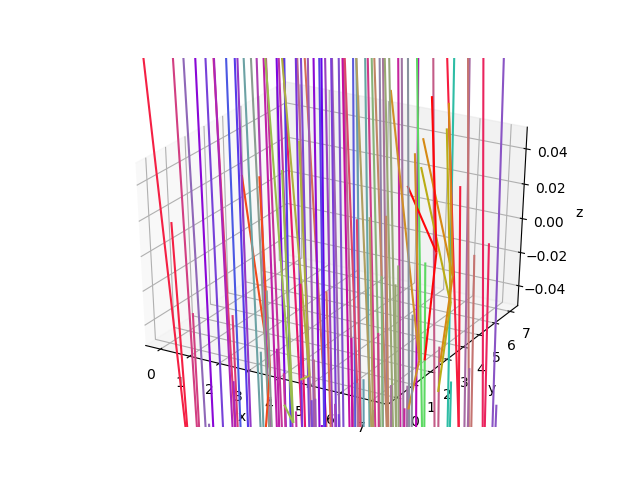

In [107]:
fig = plot_state(final_state[L_idx][T_idx])
fig.show()

<IPython.core.display.Javascript object>


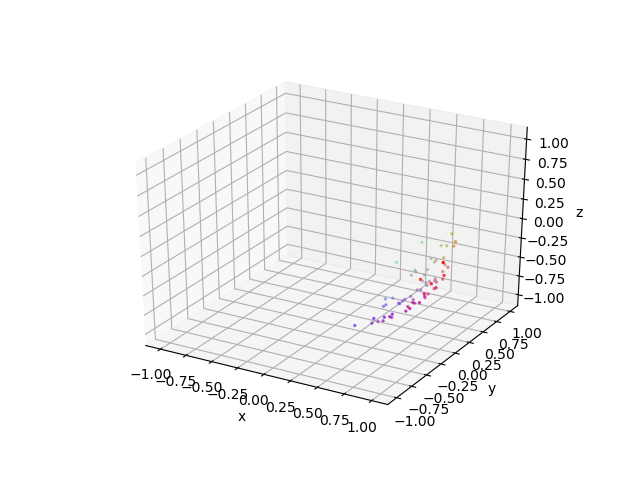

In [108]:
fig = plot_spin_directions(final_state[0][0])
fig.show()

## System results

In [109]:
# SELECT WARMUP PERIOD TO LAST UNTIL STEP NUMBER warmup_final_step
warmup_final_step = 0.2e7
warmup_final_idx = np.argmax(np.equal(t_whole[0,0], warmup_final_step))
t = t_whole[:, :, warmup_final_idx:]
e = e_whole[:, :, warmup_final_idx:]
m = m_whole[:, :, warmup_final_idx:]

In [110]:
E_mean = np.mean(e, axis=2)
E_std = np.sqrt(np.var(e, axis=2))

e_mean = np.zeros(shape=E_mean.shape)
e_std = np.zeros(shape=E_std.shape)
for i in range(L_num):
    e_mean[i] = E_mean[i]/L[i]**3
    e_std[i] = E_std[i]/L[i]**3

<IPython.core.display.Javascript object>


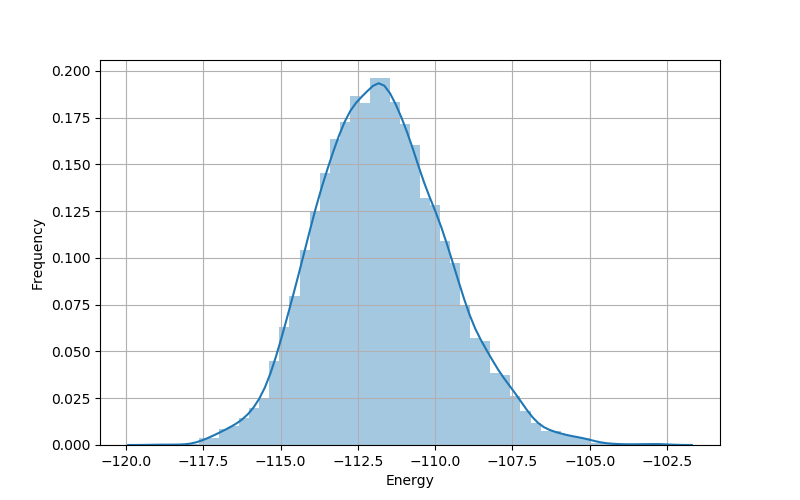

In [111]:
fig = plt.figure(figsize=(8,5))
e_tbp=e[0,0]
#e_tbp = e_tbp[e_tbp>-1e4]
sns.distplot(e_tbp)
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_distribution_test.svg")

### Mean energy

<IPython.core.display.Javascript object>


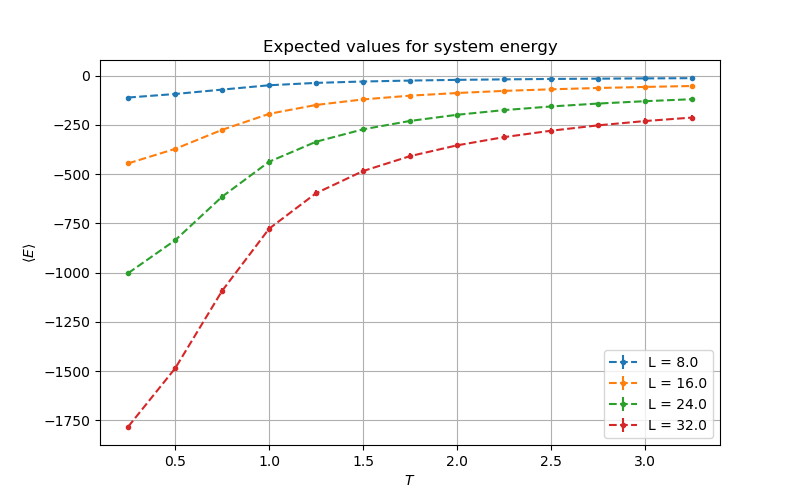

In [112]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, E_mean[i], yerr=E_std[i]/2, fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.title("Expected values for system energy")
plt.xlabel(r"$T$")
plt.ylabel(r"$\langle E \rangle$")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_system_energy.svg")

<IPython.core.display.Javascript object>


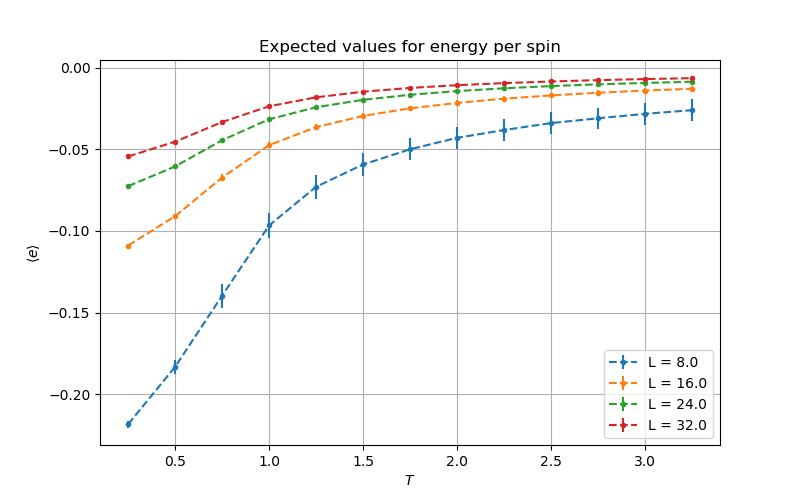

In [113]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, e_mean[i], yerr=e_std[i]/2, fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.title("Expected values for energy per spin")
plt.xlabel(r"$T$")
plt.ylabel(r"$\langle e \rangle$")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_energy_per_spin.svg")

### Mean magnetization magnitude

In [114]:
M_mean = np.mean(m, axis=2)
M_std = np.sqrt(np.var(m, axis=2))
M_magnitude = np.sqrt(np.sum(m**2, axis = 3))
M_magnitude_mean = np.mean(M_magnitude, axis=2)
M_magnitude_std = np.sqrt(np.var(M_magnitude, axis=2))

In [115]:
Tc_idx   = np.argmax(T>1.444)
T_nc_max = np.argmax(T>1.5)
T_nc_min = np.argmax(T>1.3)

T_dis = T[Tc_idx:]
T_ord = T[:Tc_idx]
T_dis_nc = T[Tc_idx:T_nc_max]
T_ord_nc = T[T_nc_min:Tc_idx]

<IPython.core.display.Javascript object>


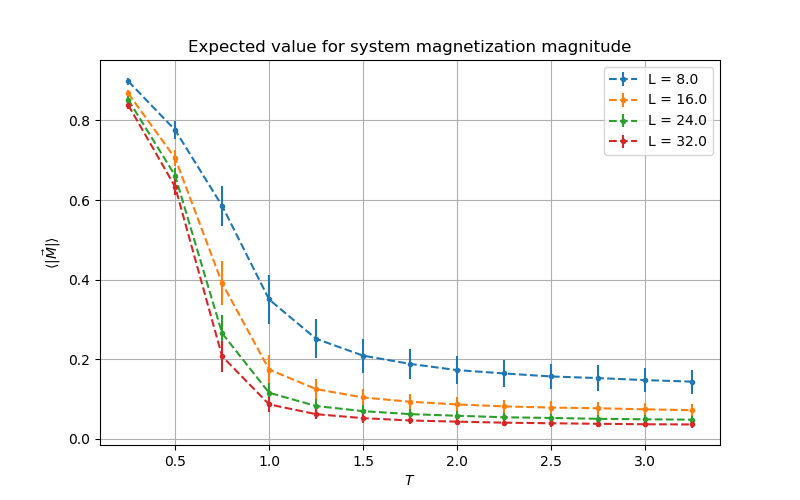

In [116]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.errorbar(T, M_magnitude_mean[i], yerr=M_magnitude_std[i]/2,fmt="--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"$\langle | \vec{M} | \rangle$")
plt.grid()
plt.title("Expected value for system magnetization magnitude")
plt.show()
fig.savefig("./plots/"+setname+"_magnetization_magnitude.svg")

### Heat capacity

In [117]:
E_var = np.var(e, axis=2)

In [118]:
e.shape

(4, 13, 9601)

In [129]:
cv = np.zeros(shape=(L_num, T_num))
for i in np.ndindex(L_num):
    cv[i] = E_var[i]/T**2/L[i]**2

<IPython.core.display.Javascript object>


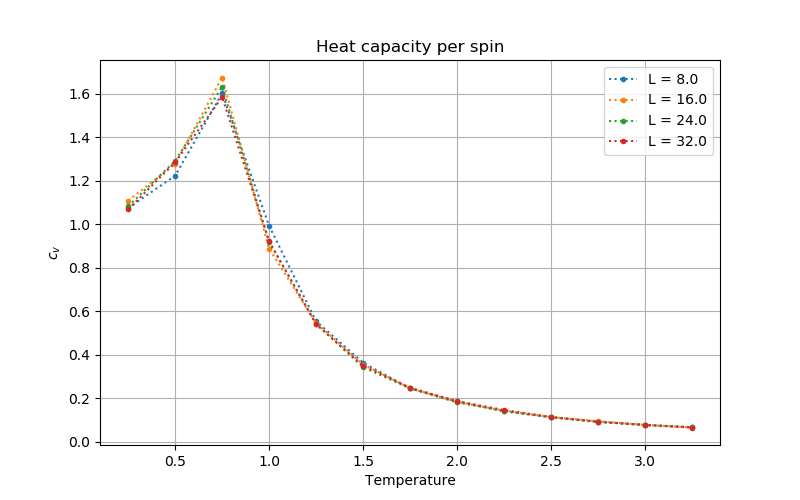

In [130]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, cv[i], ":.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.xlabel("Temperature")
plt.ylabel(r"$c_v$")
plt.title("Heat capacity per spin")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_heat_capacity.svg")

### Suscpetibility

In [121]:
def cov(M,i,j):
    M_mean = np.mean(M, axis=2)
    ret = np.zeros(shape=(L_num, T_num))
    for l,t in np.ndindex(L_num, T_num):
        ret[l,t] = np.mean((M[l,t,:,i]-M_mean[l,t,i])*(M[l,t,:,j]-M_mean[l,t,j]))
    return ret

In [122]:
chi_xx = np.zeros(shape=(L_num, T_num))
chi_yy = np.zeros(shape=(L_num, T_num))
chi_zz = np.zeros(shape=(L_num, T_num))
chi_xy = np.zeros(shape=(L_num, T_num))
chi_yz = np.zeros(shape=(L_num, T_num))
chi_zx = np.zeros(shape=(L_num, T_num))

for i in np.ndindex(L_num):
    chi_xx[i] = cov(m,0,0)[i]/T
    chi_yy[i] = cov(m,1,1)[i]/T
    chi_zz[i] = cov(m,2,2)[i]/T
    chi_xy[i] = cov(m,0,1)[i]/T
    chi_yz[i] = cov(m,1,2)[i]/T
    chi_zx[i] = cov(m,2,0)[i]/T

In [123]:
m_dis = m[:,Tc_idx:]
m_ord = m[:,:Tc_idx]

chi_xx_dis = chi_xx[:, Tc_idx:]
chi_yy_dis = chi_yy[:, Tc_idx:]
chi_zz_dis = chi_zz[:, Tc_idx:]
chi_xy_dis = chi_xy[:, Tc_idx:]
chi_yz_dis = chi_yz[:, Tc_idx:]
chi_zx_dis = chi_zx[:, Tc_idx:]

<IPython.core.display.Javascript object>


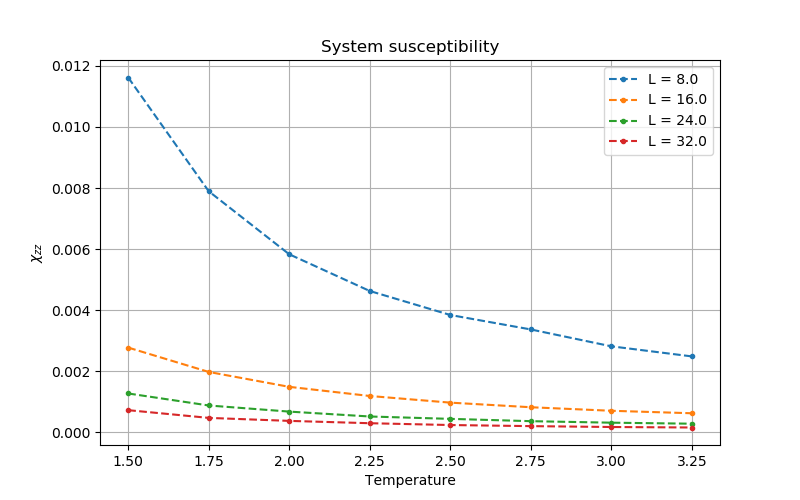

In [124]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T[Tc_idx:], chi_zz[i][Tc_idx:], "--.", label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.title("System susceptibility")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+"_system_susceptibility.svg")

<IPython.core.display.Javascript object>


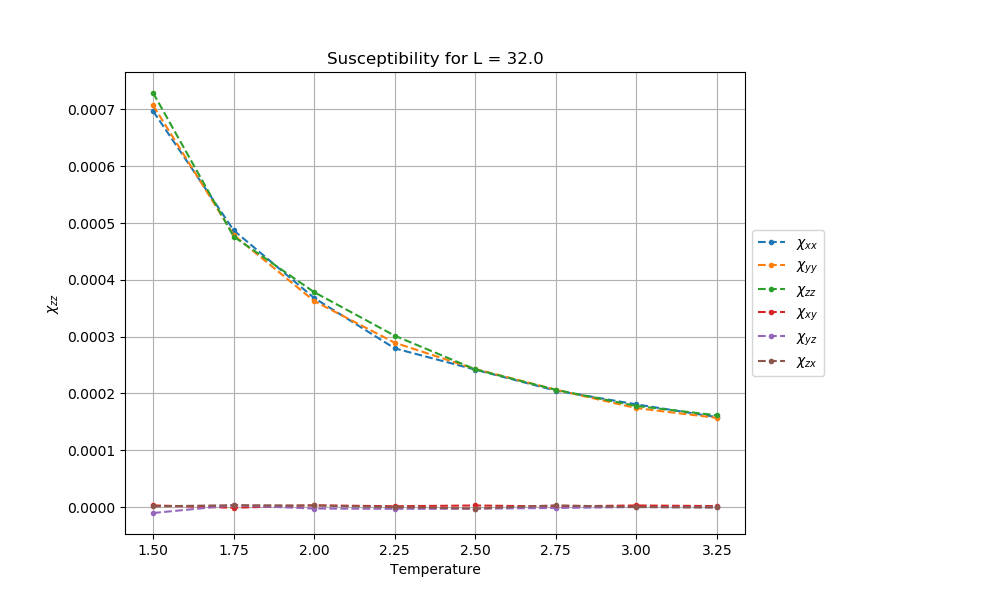

In [125]:
L_idx = -1

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(T_dis, chi_xx_dis[L_idx], ".--", label=r"$\chi_{xx}$")
ax.plot(T_dis, chi_yy_dis[L_idx], ".--", label=r"$\chi_{yy}$")
ax.plot(T_dis, chi_zz_dis[L_idx], ".--", label=r"$\chi_{zz}$")
ax.plot(T_dis, chi_xy_dis[L_idx], ".--", label=r"$\chi_{xy}$")
ax.plot(T_dis, chi_yz_dis[L_idx], ".--", label=r"$\chi_{yz}$")
ax.plot(T_dis, chi_zx_dis[L_idx], ".--", label=r"$\chi_{zx}$")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Temperature")
plt.ylabel(r"$\chi_{zz}$")
plt.title(f"Susceptibility for L = {L[L_idx]}")
plt.grid()
plt.show()
fig.savefig("./plots/"+setname+f"_L{L[L_idx]}_susceptibility.svg")

### Binder ratio

In [126]:
binder = 1 - (1/3)*np.mean(M_magnitude**4, axis=2)/(np.mean(M_magnitude**2, axis=2)**2)

<IPython.core.display.Javascript object>


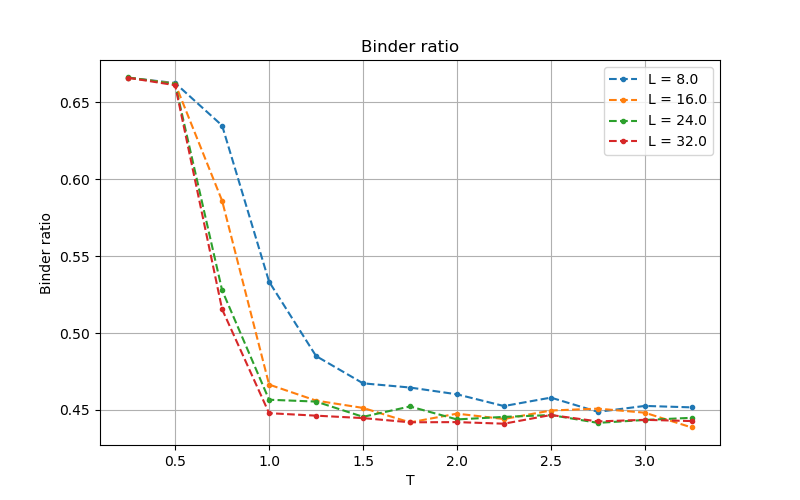

In [127]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T, binder[i], '--.', label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.ylabel(r"Binder ratio")
plt.xlabel(r"T")
plt.title("Binder ratio")
plt.grid()
plt.show()
fig.savefig("plots/"+setname+"_binder.svg")

<IPython.core.display.Javascript object>


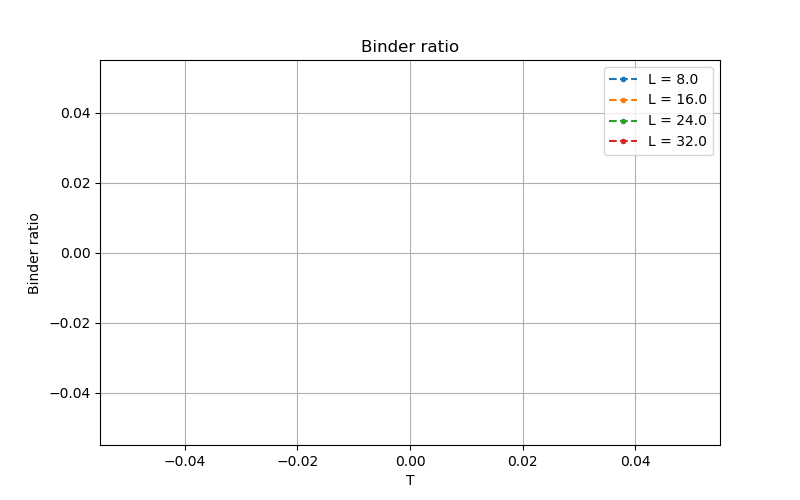

In [128]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in np.ndindex(L_num):
    ax.plot(T[11:-11], binder[i][11:-11], '--.', label=f"L = {L[i]}")
box = ax.get_position()
ax.legend()
plt.ylabel(r"Binder ratio")
plt.xlabel(r"T")
plt.title("Binder ratio")
plt.grid()
plt.show()
fig.savefig("plots/"+setname+"_binder_zoomed.svg")